<a href="https://colab.research.google.com/github/parsasemi/lorawan/blob/main/Lora_Dataset_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# List of data file names
data_files = ['data0.txt', 'data.txt', 'data3.txt']

# Initialize a dictionary to store RSSI values for each tile
tile_rssi = {}

# Read and merge data from all files
for file_name in data_files:
    with open(file_name, 'r') as file:
        lines = file.readlines()
    for line in lines:
        line = line.strip()
        if not line:  # Skip empty lines
            continue
        timestamp, rest = line.split(' {"')
        timestamp = timestamp.strip()
        rest = rest.split('",')
        data_dict = {'Timestamp': timestamp}
        for item in rest:
            # Adjust the splitting to remove additional quotation marks
            key, value = item.split('":"')
            key = key.strip('"')  # Remove leading/trailing quotation marks
            data_dict[key] = value.strip('"')

        # Print data_dict for debugging
        print("data_dict:", data_dict)

        # Check if 'Comment' key is present
        if 'Comment' not in data_dict:
            continue  # Skip lines without 'Comment' key

        # Extract tile coordinates and remove any non-numeric characters
        coord_values = ''.join(filter(str.isdigit, data_dict['Comment'])).split(',')
        if len(coord_values) != 2:
            continue  # Skip lines with incorrect number of coordinate values
        x_coord, y_coord = map(int, coord_values)

        # Extract RSSI value and construct corresponding key
        rssi_key = f"{x_coord}_{y_coord}"

        # Print rssi_key for debugging
        print("rssi_key:", rssi_key)

        # Append RSSI value to the list associated with the key
        tile_rssi.setdefault(rssi_key, []).append(int(data_dict['RSSI']))

        # Print rssis for debugging
        rssis = tile_rssi[rssi_key]
        print("rssis:", rssis)

# Calculate the average RSSI value for each key
for key, rssis in tile_rssi.items():
    average_rssi = sum(rssis) / len(rssis)
    tile_rssi[key] = average_rssi

# Convert the dictionary to a DataFrame
rssi_df = pd.DataFrame(tile_rssi.items(), columns=['Tile', 'Average_RSSI'])

# Save the DataFrame to a CSV file
rssi_df.to_csv('extracted_rssi_values.csv', index=False)

# Print the first few rows of the DataFrame for debugging
print(rssi_df.head())


Streaming output truncated to the last 5000 lines.
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R3', 'RSSI': '-100', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R2', 'RSSI': '-80', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R1', 'RSSI': '-94', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R4', 'RSSI': '-88', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'R2 to R4', 'RSSI': '-83', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R4', 'RSSI': '-88', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R4', 'RSSI': '-88', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'R2 to R1', 'RSSI': '-94', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R1', 'RSSI': '-94', 'Comment': '11,49"}'}
data_dict: {'Timestamp': '10:27:31', 'Data': 'S0 to R1', 'RSSI': '-94', 'Comment': '11,49"}'}
data_dic

In [ ]:
import pandas as pd

# Define function to parse each line and extract relevant information
def parse_line(line):
    try:
        parts = line.split()
        timestamp = parts[0]
        data_info = eval(' '.join(parts[1:]))
        comment = tuple(map(int, data_info['Comment'].split(',')))
        return timestamp, data_info['Data'], int(data_info['RSSI']), comment
    except (IndexError, ValueError, KeyError):
        return None

# Read data from the text file and filter out invalid lines
data = []
with open('merged data.txt', 'r') as file:
    for line in file:
        line_data = parse_line(line.strip())
        if line_data:
            data.append(line_data)

# Create DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Data', 'RSSI', 'Comment'])

# Pivot the DataFrame to have columns for each 'Data' type and corresponding RSSI values
pivot_df = df.pivot_table(index='Comment', columns='Data', values='RSSI', aggfunc='mean')

# Fill missing values with 0
pivot_df.fillna(0, inplace=True)

# Save the pivoted DataFrame to Excel
with pd.ExcelWriter('rssi_values_with_timestamp.xlsx') as writer:
    pivot_df.to_excel(writer, index=True, sheet_name='RSSI_values')

print("RSSI values with timestamps extracted and saved to 'rssi_values_with_timestamp.xlsx' file.")


RSSI values with timestamps extracted and saved to 'rssi_values_with_timestamp.xlsx' file.


In [ ]:
import pandas as pd

# Define function to parse each line and extract relevant information
def parse_line(line):
    try:
        parts = line.split()
        timestamp = parts[0]
        data_info = eval(' '.join(parts[1:]))
        comment = tuple(map(int, data_info['Comment'].split(',')))
        return timestamp, data_info['Data'], int(data_info['RSSI']), comment
    except (IndexError, ValueError, KeyError):
        return None

# Read data from the text file and filter out invalid lines
data = []
timestamps = {}  # Store timestamps corresponding to the first measurement of each pair of data
with open('merged data.txt', 'r') as file:
    for line in file:
        line_data = parse_line(line.strip())
        if line_data:
            timestamp, data_type, rssi, comment = line_data
            if comment not in timestamps:
                timestamps[comment] = timestamp
            data.append((timestamps[comment], data_type, rssi, comment))

# Create DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Data', 'RSSI', 'Comment'])

# Pivot the DataFrame to have columns for each 'Data' type and corresponding RSSI values
pivot_df = df.pivot_table(index='Comment', columns='Data', values='RSSI', aggfunc='mean')

# Fill missing values with 0
pivot_df.fillna(0, inplace=True)

# Save the pivoted DataFrame to Excel
pivot_df.to_excel('rssi_values_with_timestamp.xlsx')

print("RSSI values extracted and saved to 'rssi_values_with_timestamp.xlsx' file.")


RSSI values extracted and saved to 'rssi_values_with_timestamp.xlsx' file.


In [ ]:
import pandas as pd

# Define function to parse each line and extract relevant information
def parse_line(line):
    try:
        parts = line.split()
        timestamp = parts[0]
        data_info = eval(' '.join(parts[1:]))
        comment = tuple(map(int, data_info['Comment'].split(',')))
        return timestamp, data_info['Data'], int(data_info['RSSI']), comment
    except (IndexError, ValueError, KeyError):
        return None

# Read data from the text file and filter out invalid lines
data = []
timestamps = {}  # Store timestamps corresponding to the first measurement of each pair of data
with open('merged data.txt', 'r') as file:
    for line in file:
        line_data = parse_line(line.strip())
        if line_data:
            timestamp, data_type, rssi, comment = line_data
            if comment not in timestamps:
                timestamps[comment] = timestamp
            data.append((timestamps[comment], timestamp, data_type, rssi, comment))

# Create DataFrame
df = pd.DataFrame(data, columns=['First_Timestamp', 'Timestamp', 'Data', 'RSSI', 'Comment'])

# Pivot the DataFrame to have columns for each 'Data' type and corresponding RSSI values
pivot_df = df.pivot_table(index=['Comment', 'First_Timestamp'], columns='Data', values='RSSI', aggfunc='mean')

# Fill missing values with 0
pivot_df.fillna(0, inplace=True)

# Reset index to flatten multi-index
pivot_df.reset_index(inplace=True)

# Save the pivoted DataFrame to Excel
pivot_df.to_excel('rssi_values_with_timestamp.xlsx', index=False)

print("RSSI values extracted and saved to 'rssi_values_with_timestamp.xlsx' file.")


RSSI values extracted and saved to 'rssi_values_with_timestamp.xlsx' file.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Load and Preprocess Data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')

# Convert target coordinates from string to numerical format
data['Comment'] = data['Comment'].apply(lambda x: eval(x))

# Extract features (RSSI values from S0 to R1, R2, R3, R4) and target (coordinates)
X = data[['S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']].values
y = data['Comment'].values

# Split the target variable into separate arrays for X and Y coordinates
y_x = np.array([coord[0] for coord in y])  # Extract X coordinates
y_y = np.array([coord[1] for coord in y])  # Extract Y coordinates

# Step 2: Split Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 3: Scale Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build Regression Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1),  # 1 output neuron for X coordinate
    Dense(1)   # 1 output neuron for Y coordinate
])

# Step 5: Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Train Model
history = model.fit(X_train_scaled, [y_x_train, y_y_train], epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Evaluate Model
test_loss, test_mae = model.evaluate(X_test_scaled, [y_x_test, y_y_test], verbose=0)
print("Test Mean Absolute Error (MAE):", test_mae)

# Step 8: Make Predictions
# You can now use the trained model to make predictions for localization.


Epoch 1/50
25/25 [==============================] - 2s 13ms/step - loss: 2688.9656 - mae: 44.6890 - val_loss: 2822.5061 - val_mae: 46.5667
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 2618.7102 - mae: 43.9769 - val_loss: 2719.1975 - val_mae: 45.5752
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 2478.2793 - mae: 42.5607 - val_loss: 2515.0222 - val_mae: 43.6157
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 2215.0159 - mae: 39.9487 - val_loss: 2152.5103 - val_mae: 40.0398
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 1776.0887 - mae: 35.4336 - val_loss: 1599.7729 - val_mae: 34.1439
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 1188.1327 - mae: 28.7464 - val_loss: 946.7982 - val_mae: 25.9725
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 632.7767 - mae: 20.7884 - val_loss: 462.0860 - val_mae: 18.0180
Epoch 8/50
25/25 [==================

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 2688.7952 - mae: 44.7104 - val_loss: 2829.9172 - val_mae: 46.6503
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 2623.4224 - mae: 44.0384 - val_loss: 2744.9199 - val_mae: 45.8303
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 2502.6167 - mae: 42.8255 - val_loss: 2582.8438 - val_mae: 44.2895
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 2278.2017 - mae: 40.5947 - val_loss: 2290.2153 - val_mae: 41.4419
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 1903.5198 - mae: 36.7729 - val_loss: 1840.2167 - val_mae: 36.7869
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 1392.3917 - mae: 31.1208 - val_loss: 1264.2869 - val_mae: 30.3363
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 844.3239 - mae: 24.0153 - val_loss: 731.8343 - val_mae: 22.8167
Epoch 8/50
25/25 [=================

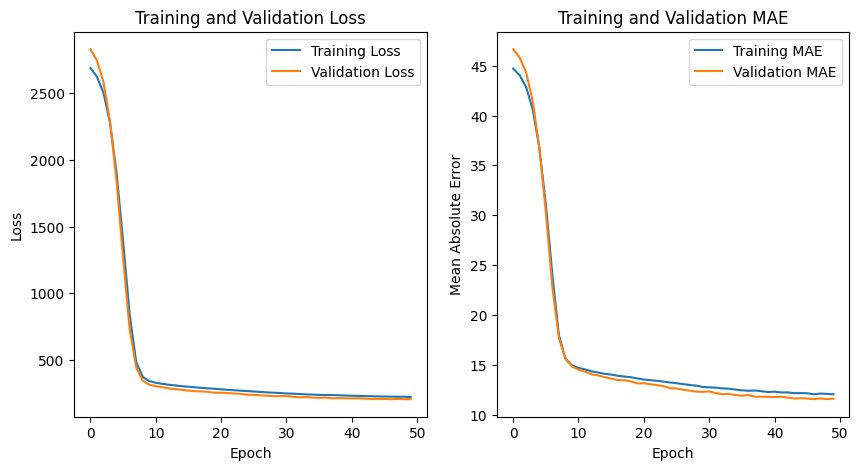

Test Mean Absolute Error (MAE): 12.548795700073242
8/8 [==============================] - 0s 2ms/step
Accuracy within 50 meter(s): 65.02057613168725 %


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')

# Convert target coordinates from string to numerical format
data['Comment'] = data['Comment'].apply(lambda x: eval(x))

# Extract features (RSSI values from S0 to R1, R2, R3, R4) and target (coordinates)
X = data[['S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']].values
y = data['Comment'].values

# Split the target variable into separate arrays for X and Y coordinates
y_x = np.array([coord[0] for coord in y])  # Extract X coordinates
y_y = np.array([coord[1] for coord in y])  # Extract Y coordinates

# Step 2: Split Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 3: Scale Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build Regression Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1),  # 1 output neuron for X coordinate
    Dense(1)   # 1 output neuron for Y coordinate
])

# Step 5: Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Train Model
history = model.fit(X_train_scaled, [y_x_train, y_y_train], epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Plot Training History
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.show()

# Step 8: Evaluate Model on Test Data
test_loss, test_mae = model.evaluate(X_test_scaled, [y_x_test, y_y_test], verbose=0)
print("Test Mean Absolute Error (MAE):", test_mae)


# Define a threshold distance
threshold_distance = 50  # Assuming threshold is 1 meter

# Calculate Euclidean distance between predicted and true coordinates
predicted_coordinates = model.predict(X_test_scaled)
distance = np.sqrt((predicted_coordinates[0] - y_x_test)**2 + (predicted_coordinates[1] - y_y_test)**2)

# Count the number of predictions within the threshold distance
within_threshold = np.sum(distance <= threshold_distance)

# Calculate the percentage of predictions within the threshold distance
accuracy = (within_threshold / len(y_x_test)) * 100
print("Accuracy within", threshold_distance, "meter(s):", accuracy, "%")



Printing the outputs to see what is going on (only 1 epoch)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')
data['Comment'] = data['Comment'].apply(lambda x: eval(x))
X = data[['S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']].values
y = data['Comment'].values
y_x = np.array([coord[0] for coord in y])
y_y = np.array([coord[1] for coord in y])

# Split data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Run one epoch
history = model.fit(X_train_scaled, [y_x_train, y_y_train], epochs=1, batch_size=32, validation_split=0.2, verbose=1)

# Print input data and model's predicted outputs
print("Input Data:")
print(X_test_scaled)
predictions = model.predict(X_test_scaled)
print("\nPredicted Outputs:")
print("X Coordinate Predictions:", predictions[0])
print("Y Coordinate Predictions:", predictions[1])


25/25 [==============================] - 1s 11ms/step - loss: 2676.3616 - mae: 44.5381 - val_loss: 2779.9812 - val_mae: 46.0857
Input Data:
[[ 5.97091571e-01  4.10432577e-01  4.49966945e-01  7.97318689e-01]
 [ 7.25657368e-01 -2.95573166e-01  8.80671458e-01  1.10761020e+00]
 [ 1.01493041e+00 -6.32530453e-01 -8.42146594e-01 -8.52125672e-01]
 [-1.56442091e+00  1.62989704e+00 -1.16517498e+00 -6.56152084e-01]
 [ 7.97975630e-01 -2.95573166e-01  1.80776625e-01 -6.82313219e-02]
 [-1.85369395e+00  9.07845714e-01  1.36521404e+00 -1.39105304e+00]
 [ 5.08702585e-01  1.37657631e-01 -3.45756319e-02 -3.13198306e-01]
 [-1.82958786e+00 -9.69487739e-01 -3.45756319e-02  3.72709250e-01]
 [-6.98435059e-02  7.15298693e-01 -1.11133691e+00  2.97554718e-02]
 [ 1.47294607e+00 -8.25077473e-01 -1.64971756e+00  3.72709250e-01]
 [ 5.08702585e-01 -1.40271854e+00  2.34614689e-01  1.20559700e+00]
 [-9.85874816e-01  1.43735002e+00  1.92624322e-02 -5.09171894e-01]
 [ 4.60490410e-01 -1.16203476e+00 -1.00366079e+00  6.176

Using simple regression model (seperate for X and Y)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error

# Step 1: Load and Preprocess Data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')

# Convert target coordinates from string to numerical format
data['Comment'] = data['Comment'].apply(lambda x: eval(x))

# Extract features (RSSI values from S0 to R1, R2, R3, R4) and target (coordinates)
X = data[['S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']].values
y = data['Comment'].values

# Split the target variable into separate arrays for X and Y coordinates
y_x = np.array([coord[0] for coord in y])  # Extract X coordinates
y_y = np.array([coord[1] for coord in y])  # Extract Y coordinates

# Step 2: Split Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 3: Scale Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build Regression Models
model_x = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],))  # 1 output neuron for X coordinate
])

model_y = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],))  # 1 output neuron for Y coordinate
])

# Step 5: Compile Models
model_x.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_y.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Train Models
history_x = model_x.fit(X_train_scaled, y_x_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
history_y = model_y.fit(X_train_scaled, y_y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Evaluate Models on Test Data
test_loss_x, test_mae_x = model_x.evaluate(X_test_scaled, y_x_test, verbose=0)
test_loss_y, test_mae_y = model_y.evaluate(X_test_scaled, y_y_test, verbose=0)
print("Test MAE for X coordinate:", test_mae_x)
print("Test MAE for Y coordinate:", test_mae_y)




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Load and Preprocess Data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')

# Convert target coordinates from string to numerical format
data['Comment'] = data['Comment'].apply(lambda x: eval(x))

# Extract features (RSSI values from S0 to R1, R2, R3, R4) and target (coordinates)
X = data[['S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']].values
y = data['Comment'].values

# Split the target variable into separate arrays for X and Y coordinates
y_x = np.array([coord[0] for coord in y])  # Extract X coordinates
y_y = np.array([coord[1] for coord in y])  # Extract Y coordinates

# Step 2: Split Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 3: Scale Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build Regression Models
model_x = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],))  # 1 output neuron for X coordinate
])

model_y = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],))  # 1 output neuron for Y coordinate
])

# Step 5: Compile Models
model_x.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_y.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Train Models
history_x = model_x.fit(X_train_scaled, y_x_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
history_y = model_y.fit(X_train_scaled, y_y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Evaluate Models on Test Data
test_loss_x, test_mae_x = model_x.evaluate(X_test_scaled, y_x_test, verbose=0)
test_loss_y, test_mae_y = model_y.evaluate(X_test_scaled, y_y_test, verbose=0)
print("Test MAE for X coordinate:", test_mae_x)
print("Test MAE for Y coordinate:", test_mae_y)

# Step 8: Define function to predict coordinates from RSSI values
def predict_coordinates(model_x, model_y, scaler):
    while True:
        # Prompt for RSSI values for R1, R2, R3, and R4
        rssi_values = []
        for i in range(1, 5):
            rssi = float(input(f"Enter RSSI value for R{i}: "))
            rssi_values.append(rssi)

        # Scale the input RSSI values
        scaled_rssi_values = scaler.transform(np.array(rssi_values).reshape(1, -1))

        # Predict coordinates using the trained models
        predicted_coordinate_x = model_x.predict(scaled_rssi_values)
        predicted_coordinate_y = model_y.predict(scaled_rssi_values)

        print("Predicted Coordinates (x, y):", predicted_coordinate_x[0][0], predicted_coordinate_y[0][0])

        # Ask if user wants to continue or stop
        choice = input("Do you want to continue? (y/n): ")
        if choice.lower() != 'y':
            break

# Step 9: Call the function to predict coordinates interactively
predict_coordinates(model_x, model_y, scaler)



Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 2728.3701 - mae: 44.9178 - val_loss: 2894.0605 - val_mae: 47.1238
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 2724.2710 - mae: 44.8914 - val_loss: 2890.0222 - val_mae: 47.0978
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 2720.2341 - mae: 44.8668 - val_loss: 2885.8962 - val_mae: 47.0710
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 2716.2686 - mae: 44.8422 - val_loss: 2881.8123 - val_mae: 47.0447
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 2712.2488 - mae: 44.8166 - val_loss: 2877.8616 - val_mae: 47.0190
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 2708.2583 - mae: 44.7909 - val_loss: 2873.9365 - val_mae: 46.9933
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 2704.3303 - mae: 44.7653 - val_loss: 2870.0706 - val_mae: 46.9678
Epoch 8/50
25/25 [================

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Load and Preprocess Data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')

# Convert target coordinates from string to numerical format
data['Comment'] = data['Comment'].apply(lambda x: eval(x))

# Extract features (RSSI values from S0 to R1, R2, R3, R4) and target (coordinates)
X = data[['S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']].values
y = data['Comment'].values

# Take the absolute values and then apply logarithm
X_log = np.log(np.abs(X))

# Split the target variable into separate arrays for X and Y coordinates
y_x = np.array([coord[0] for coord in y])  # Extract X coordinates
y_y = np.array([coord[1] for coord in y])  # Extract Y coordinates

# Step 2: Split Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X_log, y_x, y_y, test_size=0.2, random_state=42)

# Step 3: Scale Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build Regression Models
model_x = LinearRegression()
model_y = LinearRegression()

# Step 5: Train Models
model_x.fit(X_train_scaled, y_x_train)
model_y.fit(X_train_scaled, y_y_train)

# Step 6: Evaluate Models on Test Data
test_pred_x = model_x.predict(X_test_scaled)
test_mae_x = mean_absolute_error(y_x_test, test_pred_x)
print("Test MAE for X coordinate:", test_mae_x)

test_pred_y = model_y.predict(X_test_scaled)
test_mae_y = mean_absolute_error(y_y_test, test_pred_y)
print("Test MAE for Y coordinate:", test_mae_y)

# Step 7: Define function to predict coordinates from RSSI values
def predict_coordinates(model_x, model_y, scaler):
    while True:
        # Prompt for RSSI values for R1, R2, R3, and R4
        rssi_values = []
        for i in range(1, 5):
            rssi = float(input(f"Enter RSSI value for R{i}: "))
            rssi_values.append(rssi)

        # Take the absolute values and then apply logarithm
        rssi_values_log = np.log(np.abs(np.array(rssi_values)))

        # Scale the input RSSI values
        scaled_rssi_values = scaler.transform(np.array(rssi_values_log).reshape(1, -1))

        # Predict coordinates using the trained models
        predicted_coordinate_x = model_x.predict(scaled_rssi_values)
        predicted_coordinate_y = model_y.predict(scaled_rssi_values)

        print("Predicted Coordinates (x, y):", predicted_coordinate_x[0], predicted_coordinate_y[0])

        # Ask if user wants to continue or stop
        choice = input("Do you want to continue? (y/n): ")
        if choice.lower() != 'y':
            break

# Step 8: Call the function to predict coordinates interactively
predict_coordinates(model_x, model_y, scaler)


Test MAE for X coordinate: 13.235483824727341
Test MAE for Y coordinate: 7.2160521374445805
Enter RSSI value for R1: -20
Enter RSSI value for R2: -100
Enter RSSI value for R3: -120
Enter RSSI value for R4: -120
Predicted Coordinates (x, y): -89.22608032622642 -55.769401998299344
Do you want to continue? (y/n): y
Enter RSSI value for R1: 20
Enter RSSI value for R2: 100
Enter RSSI value for R3: 120
Enter RSSI value for R4: 120
Predicted Coordinates (x, y): -89.22608032622642 -55.769401998299344


KeyboardInterrupt: Interrupted by user

Testing the model with the path loss model dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Load and Preprocess Data
data = pd.read_excel('Distance for generated path loss ( k = 22) .xlsx')

# Extract features (RSSI values from R1 to R4) and target (coordinates)
X = data[['R1', 'R2', 'R3', 'R4']].values
y = data['Comment'].apply(eval).values

# Take the absolute values and then apply logarithm
X_log = np.log(np.abs(X))

# Split the target variable into separate arrays for X and Y coordinates
y_x = np.array([coord[0] for coord in y])  # Extract X coordinates
y_y = np.array([coord[1] for coord in y])  # Extract Y coordinates

# Step 2: Split Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X_log, y_x, y_y, test_size=0.2, random_state=42)

# Step 3: Scale Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build Regression Models
model_x = LinearRegression()
model_y = LinearRegression()

# Step 5: Train Models
model_x.fit(X_train_scaled, y_x_train)
model_y.fit(X_train_scaled, y_y_train)

# Step 6: Evaluate Models on Test Data
test_pred_x = model_x.predict(X_test_scaled)
test_mae_x = mean_absolute_error(y_x_test, test_pred_x)
print("Test MAE for X coordinate:", test_mae_x)

test_pred_y = model_y.predict(X_test_scaled)
test_mae_y = mean_absolute_error(y_y_test, test_pred_y)
print("Test MAE for Y coordinate:", test_mae_y)

# Step 7: Define function to predict coordinates from RSSI values
def predict_coordinates(model_x, model_y, scaler):
    while True:
        # Prompt for RSSI values for R1, R2, R3, and R4
        rssi_values = []
        for i in range(1, 5):
            rssi = float(input(f"Enter RSSI value for R{i}: "))
            rssi_values.append(rssi)

        # Take the absolute values and then apply logarithm
        rssi_values_log = np.log(np.abs(np.array(rssi_values)))

        # Scale the input RSSI values
        scaled_rssi_values = scaler.transform(np.array(rssi_values_log).reshape(1, -1))

        # Predict coordinates using the trained models
        predicted_coordinate_x = model_x.predict(scaled_rssi_values)
        predicted_coordinate_y = model_y.predict(scaled_rssi_values)

        print("Predicted Coordinates (x, y):", predicted_coordinate_x[0], predicted_coordinate_y[0])

        # Ask if user wants to continue or stop
        choice = input("Do you want to continue? (y/n): ")
        if choice.lower() != 'y':
            break

# Step 8: Call the function to predict coordinates interactively
predict_coordinates(model_x, model_y, scaler)


Test MAE for X coordinate: 1.4774592309131036
Test MAE for Y coordinate: 4.400724943939976
Enter RSSI value for R1: 0.99
Enter RSSI value for R2: 26.9
Enter RSSI value for R3: 49.47
Enter RSSI value for R4: 43
Predicted Coordinates (x, y): -24.044817923215078 -28.605088395857685


KeyboardInterrupt: Interrupted by user

Training a new model on distances

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Step 1: Load the Data
data = pd.read_excel('Distance for generated path loss ( k = 22) .xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (distances from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Print the size of the training data
print("Size of the training data:", X_train.shape[0])

# Step 4: Train the Models
model_x = LinearRegression()
model_x.fit(X_train, y_x_train)

model_y = LinearRegression()
model_y.fit(X_train, y_y_train)

# Step 5: Evaluate the Models
test_predictions_x = model_x.predict(X_test)
test_predictions_y = model_y.predict(X_test)

mae_x = mean_absolute_error(y_x_test, test_predictions_x)
mae_y = mean_absolute_error(y_y_test, test_predictions_y)

print("Test MAE for X coordinate:", mae_x)
print("Test MAE for Y coordinate:", mae_y)

# Continuous Prediction
while True:
    # Prompt the user for distances from R1 to R4
    r1_dist = float(input("Enter distance from R1: "))
    r2_dist = float(input("Enter distance from R2: "))
    r3_dist = float(input("Enter distance from R3: "))
    r4_dist = float(input("Enter distance from R4: "))

    # Predict the sender's position using the trained models
    input_distances = np.array([[r1_dist, r2_dist, r3_dist, r4_dist]])
    predicted_x = model_x.predict(input_distances)[0]
    predicted_y = model_y.predict(input_distances)[0]

    print("Predicted position: ({}, {})".format(predicted_x, predicted_y))

    # Ask if the user wants to continue or stop
    choice = input("Do you want to continue? (yes/no): ").lower()
    if choice != 'yes':
        break


Size of the training data: 972
Test MAE for X coordinate: 0.6343493242073909
Test MAE for Y coordinate: 1.3703735312262992
Enter distance from R1: 15.7
Enter distance from R2: 28.7
Enter distance from R3: 38
Enter distance from R4: 30


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted position: (29.00911363247098, 6.815599545550626)
Do you want to continue? (yes/no): y


KNN Algorithm with the generated dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Step 1: Load the Data
data = pd.read_excel('Generated1.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Print the size of the training data
print("Size of the training data:", X_train.shape[0])

# Step 4: Train the Models
model_x = KNeighborsRegressor(n_neighbors=6)
model_x.fit(X_train, y_x_train)

model_y = KNeighborsRegressor(n_neighbors=6)
model_y.fit(X_train, y_y_train)

# Step 5: Evaluate the Models
test_predictions_x = model_x.predict(X_test)
test_predictions_y = model_y.predict(X_test)

mae_x = mean_absolute_error(y_x_test, test_predictions_x)
mae_y = mean_absolute_error(y_y_test, test_predictions_y)

print("Test MAE for X coordinate:", mae_x)
print("Test MAE for Y coordinate:", mae_y)

# Continuous Prediction
while True:
    # Prompt the user for RSSI values from R1 to R4
    r1_rssi = float(input("Enter RSSI value from R1: "))
    r2_rssi = float(input("Enter RSSI value from R2: "))
    r3_rssi = float(input("Enter RSSI value from R3: "))
    r4_rssi = float(input("Enter RSSI value from R4: "))

    # Predict the sender's position using the trained models
    input_rssis = np.array([[r1_rssi, r2_rssi, r3_rssi, r4_rssi]])
    predicted_x = model_x.predict(input_rssis)[0]
    predicted_y = model_y.predict(input_rssis)[0]

    print("Predicted position: ({}, {})".format(predicted_x, predicted_y))

    # Ask if the user wants to continue or stop
    choice = input("Do you want to continue? (yes/no): ").lower()
    if choice != 'yes':
        break


Size of the training data: 972
Test MAE for X coordinate: 0.5308641975308642
Test MAE for Y coordinate: 0.6598079561042526


KeyboardInterrupt: Interrupted by user

Finding the best K for KNN algorithm

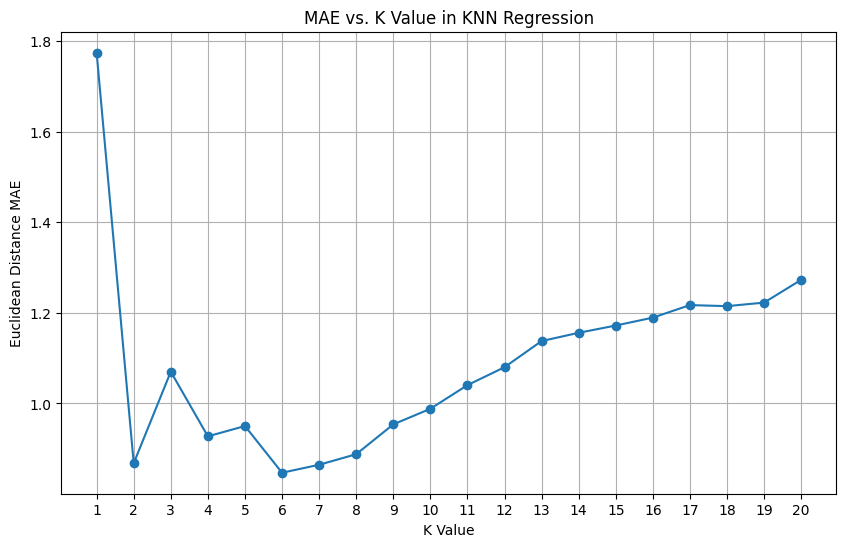

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel('Generated1.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 4: Calculate Euclidean Distance MAE
def euclidean_distance_mae(mae_x, mae_y):
    return np.sqrt(mae_x**2 + mae_y**2)

# Step 5: Train KNN Models with Different K Values
k_values = range(1, 21)  # Test K values from 1 to 20
euclidean_mae_values = []

for k in k_values:
    # Train the Models
    model_x = KNeighborsRegressor(n_neighbors=k)
    model_x.fit(X_train, y_x_train)

    model_y = KNeighborsRegressor(n_neighbors=k)
    model_y.fit(X_train, y_y_train)

    # Predictions
    test_predictions_x = model_x.predict(X_test)
    test_predictions_y = model_y.predict(X_test)

    # Calculate MAE
    mae_x = mean_absolute_error(y_x_test, test_predictions_x)
    mae_y = mean_absolute_error(y_y_test, test_predictions_y)

    # Calculate Euclidean Distance MAE
    euclidean_mae = euclidean_distance_mae(mae_x, mae_y)
    euclidean_mae_values.append(euclidean_mae)

# Step 6: Plot MAE for Different K Values
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_mae_values, marker='o', linestyle='-')
plt.title('MAE vs. K Value in KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Euclidean Distance MAE')
plt.xticks(k_values)
plt.grid(True)
plt.show()


findinf the best K for KNN for our own multipath dataset

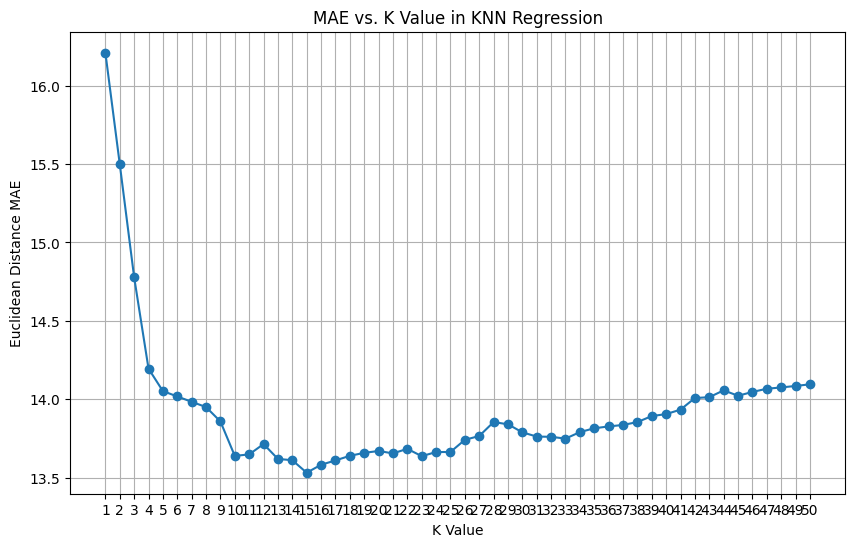

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel('simple_rssi_values.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 4: Calculate Euclidean Distance MAE
def euclidean_distance_mae(mae_x, mae_y):
    return np.sqrt(mae_x**2 + mae_y**2)

# Step 5: Train KNN Models with Different K Values
k_values = range(1, 51)  # Test K values from 1 to 20
euclidean_mae_values = []

for k in k_values:
    # Train the Models
    model_x = KNeighborsRegressor(n_neighbors=k)
    model_x.fit(X_train, y_x_train)

    model_y = KNeighborsRegressor(n_neighbors=k)
    model_y.fit(X_train, y_y_train)

    # Predictions
    test_predictions_x = model_x.predict(X_test)
    test_predictions_y = model_y.predict(X_test)

    # Calculate MAE
    mae_x = mean_absolute_error(y_x_test, test_predictions_x)
    mae_y = mean_absolute_error(y_y_test, test_predictions_y)

    # Calculate Euclidean Distance MAE
    euclidean_mae = euclidean_distance_mae(mae_x, mae_y)
    euclidean_mae_values.append(euclidean_mae)

# Step 6: Plot MAE for Different K Values
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_mae_values, marker='o', linestyle='-')
plt.title('MAE vs. K Value in KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Euclidean Distance MAE')
plt.xticks(k_values)
plt.grid(True)
plt.show()


KNN for our own multipath dataset **(remember to set different K for x & y)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Step 1: Load the Data
data = pd.read_excel('simple_rssi_values.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Print the size of the training data
print("Size of the training data:", X_train.shape[0])

# Step 4: Train the Models
model_x = KNeighborsRegressor(n_neighbors=15)
model_x.fit(X_train, y_x_train)

model_y = KNeighborsRegressor(n_neighbors=15)
model_y.fit(X_train, y_y_train)

# Step 5: Evaluate the Models
test_predictions_x = model_x.predict(X_test)
test_predictions_y = model_y.predict(X_test)

mae_x = mean_absolute_error(y_x_test, test_predictions_x)
mae_y = mean_absolute_error(y_y_test, test_predictions_y)

print("Test MAE for X coordinate:", mae_x)
print("Test MAE for Y coordinate:", mae_y)

# Continuous Prediction
while True:
    # Prompt the user for RSSI values from R1 to R4
    r1_rssi = float(input("Enter RSSI value from R1: "))
    r2_rssi = float(input("Enter RSSI value from R2: "))
    r3_rssi = float(input("Enter RSSI value from R3: "))
    r4_rssi = float(input("Enter RSSI value from R4: "))

    # Predict the sender's position using the trained models
    input_rssis = np.array([[r1_rssi, r2_rssi, r3_rssi, r4_rssi]])
    predicted_x = model_x.predict(input_rssis)[0]
    predicted_y = model_y.predict(input_rssis)[0]

    print("Predicted position: ({}, {})".format(predicted_x, predicted_y))

    # Ask if the user wants to continue or stop
    choice = input("Do you want to continue? (yes/no): ").lower()
    if choice != 'yes':
        break


Size of the training data: 972
Test MAE for X coordinate: 11.545130315500687
Test MAE for Y coordinate: 7.057887517146776
Enter RSSI value from R1: -59.3
Enter RSSI value from R2: -87.6
Enter RSSI value from R3: -84
Enter RSSI value from R4: -87.3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Predicted position: (10.466666666666667, 6.333333333333333)
Do you want to continue? (yes/no): yes
Enter RSSI value from R1: -104
Enter RSSI value from R2: -94.3
Enter RSSI value from R3: -77
Enter RSSI value from R4: -89.6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Predicted position: (54.733333333333334, 44.06666666666667)


KeyboardInterrupt: Interrupted by user

**Code to extract the 28 dec data:**

In [ ]:
import pandas as pd
import re

# Read the text file
with open('/content/data4_merged.txt', 'r') as file:
    lines = file.readlines()

# Extract comments and RSSIs
data = []
for line_number, line in enumerate(lines, start=1):
    comment_match = re.search(r'Comment:\s*(\d+)\s*,\s*(\d+)', line)
    if comment_match:
        x = int(comment_match.group(1))
        y = int(comment_match.group(2))
        comment = f'({x},{y})'
    else:
        print(f"Error extracting comment at line {line_number}: {line}")
        continue

    rssi_match = re.search(r'RSSI:\s*(-?\d+)', line)
    if rssi_match:
        rssi = int(rssi_match.group(1))
        data.append((comment, rssi))
    else:
        print(f"Error extracting RSSI at line {line_number}: {line}")

# Calculate average RSSI for each comment
averages = {}
counts = {}
for comment, rssi in data:
    key = comment
    if key in averages:
        averages[key] += rssi
        counts[key] += 1
    else:
        averages[key] = rssi
        counts[key] = 1

for key in averages:
    averages[key] /= counts[key]

# Convert to DataFrame
df = pd.DataFrame(list(averages.items()), columns=['Comment', 'Average_RSSI'])

# Write DataFrame to Excel file
df.to_excel('/content/output4.xlsx', index=False)


Error extracting comment at line 747: Receiver: 4 ,Data: hello 3, RSSI: -85, Comment: gai, Timestamp: Thu Dec 07 2023 14:48:50 GMT+0330 (Iran Standard Time)

Error extracting comment at line 748: Receiver: 4 ,Data: hello 4, RSSI: -85, Comment: gai, Timestamp: Thu Dec 07 2023 14:48:53 GMT+0330 (Iran Standard Time)



getting the size of each y group

In [ ]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('/content/output4.xlsx')

# Function to convert comment string to x, y tuple
def comment_to_xy(comment):
    x, y = map(int, comment.strip('()').split(','))
    return x, y

# Extract x, y from Comment column
comments = df['Comment'].apply(comment_to_xy)

# Group data points based on the y-coordinate
grouped_data = {}
for x, y in comments:
    if y not in grouped_data:
        grouped_data[y] = []
    grouped_data[y].append((x, y))

# Print out each group with a fixed number of points (46 points) and the size of each group
for y, data_points in grouped_data.items():
    print(f"Group for y={y}:")
    num_points = len(data_points)
    num_groups = num_points // 46
    remainder = num_points % 46
    for i in range(num_groups):
        group_size = 46
        print(f"  Group {i+1} ({group_size} points): {data_points[i*46:(i+1)*46]}")
    if remainder > 0:
        group_size = remainder
        print(f"  Remaining ({group_size} points): {data_points[num_groups*46:]}")


Group for y=1:
  Remaining (45 points): [(1, 1), (3, 1), (5, 1), (7, 1), (9, 1), (11, 1), (13, 1), (15, 1), (17, 1), (19, 1), (21, 1), (23, 1), (25, 1), (27, 1), (29, 1), (31, 1), (33, 1), (35, 1), (37, 1), (39, 1), (41, 1), (43, 1), (45, 1), (47, 1), (49, 1), (51, 1), (53, 1), (55, 1), (57, 1), (59, 1), (61, 1), (63, 1), (65, 1), (67, 1), (69, 1), (71, 1), (73, 1), (75, 1), (77, 1), (79, 1), (81, 1), (83, 1), (85, 1), (87, 1), (89, 1)]
Group for y=3:
  Remaining (45 points): [(89, 3), (87, 3), (85, 3), (83, 3), (81, 3), (79, 3), (77, 3), (75, 3), (73, 3), (71, 3), (69, 3), (67, 3), (65, 3), (63, 3), (61, 3), (59, 3), (57, 3), (55, 3), (53, 3), (51, 3), (49, 3), (47, 3), (45, 3), (43, 3), (41, 3), (39, 3), (37, 3), (35, 3), (33, 3), (31, 3), (29, 3), (27, 3), (25, 3), (23, 3), (21, 3), (19, 3), (17, 3), (15, 3), (13, 3), (11, 3), (9, 3), (7, 3), (5, 3), (3, 3), (1, 3)]
Group for y=5:
  Remaining (45 points): [(1, 5), (3, 5), (5, 5), (7, 5), (9, 5), (11, 5), (13, 5), (15, 5), (17, 5), (

SVR code

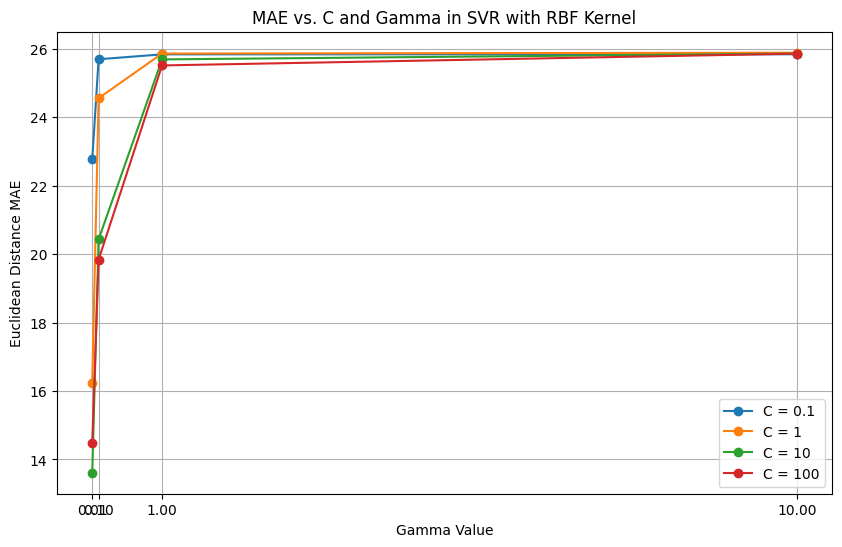

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel('simple_rssi_values.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 4: Calculate Euclidean Distance MAE
def euclidean_distance_mae(mae_x, mae_y):
    return np.sqrt(mae_x**2 + mae_y**2)

# Step 5: Train SVR Models with Different C and Gamma Values
c_values = [0.1, 1, 10, 100]  # Test C values
gamma_values = [0.01, 0.1, 1, 10]  # Test gamma values
euclidean_mae_values = []

for c in c_values:
    for gamma in gamma_values:
        # Train the Models
        model_x = SVR(kernel='rbf', C=c, gamma=gamma)
        model_x.fit(X_train, y_x_train)

        model_y = SVR(kernel='rbf', C=c, gamma=gamma)
        model_y.fit(X_train, y_y_train)

        # Predictions
        test_predictions_x = model_x.predict(X_test)
        test_predictions_y = model_y.predict(X_test)

        # Calculate MAE
        mae_x = mean_absolute_error(y_x_test, test_predictions_x)
        mae_y = mean_absolute_error(y_y_test, test_predictions_y)

        # Calculate Euclidean Distance MAE
        euclidean_mae = euclidean_distance_mae(mae_x, mae_y)
        euclidean_mae_values.append(euclidean_mae)

# Step 6: Reshape MAE Values for Plotting
euclidean_mae_array = np.array(euclidean_mae_values).reshape(len(c_values), len(gamma_values))

# Step 7: Plot MAE for Different C and Gamma Values
plt.figure(figsize=(10, 6))
for i, c in enumerate(c_values):
    plt.plot(gamma_values, euclidean_mae_array[i], label='C = {}'.format(c), marker='o')

plt.title('MAE vs. C and Gamma in SVR with RBF Kernel')
plt.xlabel('Gamma Value')
plt.ylabel('Euclidean Distance MAE')
plt.xticks(gamma_values)
plt.grid(True)
plt.legend()
plt.show()


**KNN with the first dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Step 1: Load the Data
data = pd.read_excel('Merged_data.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Print the size of the training data
print("Size of the training data:", X_train.shape[0])

# Step 4: Train the Models
model_x = KNeighborsRegressor(n_neighbors=17)
model_x.fit(X_train, y_x_train)

model_y = KNeighborsRegressor(n_neighbors=17)
model_y.fit(X_train, y_y_train)

# Step 5: Evaluate the Models
test_predictions_x = model_x.predict(X_test)
test_predictions_y = model_y.predict(X_test)

mae_x = mean_absolute_error(y_x_test, test_predictions_x)
mae_y = mean_absolute_error(y_y_test, test_predictions_y)

print("Test MAE for X coordinate:", mae_x)
print("Test MAE for Y coordinate:", mae_y)

# Continuous Prediction
while True:
    # Prompt the user for RSSI values from R1 to R4
    r1_rssi = float(input("Enter RSSI value from R1: "))
    r2_rssi = float(input("Enter RSSI value from R2: "))
    r3_rssi = float(input("Enter RSSI value from R3: "))
    r4_rssi = float(input("Enter RSSI value from R4: "))

    # Predict the sender's position using the trained models
    input_rssis = np.array([[r1_rssi, r2_rssi, r3_rssi, r4_rssi]])
    predicted_x = model_x.predict(input_rssis)[0]
    predicted_y = model_y.predict(input_rssis)[0]

    print("Predicted position: ({}, {})".format(predicted_x, predicted_y))

    # Ask if the user wants to continue or stop
    choice = input("Do you want to continue? (yes/no): ").lower()
    if choice != 'yes':
        break


Size of the training data: 972
Test MAE for X coordinate: 12.073347857661584
Test MAE for Y coordinate: 6.528685548293391


KeyboardInterrupt: Interrupted by user

obtaining the best k for knn

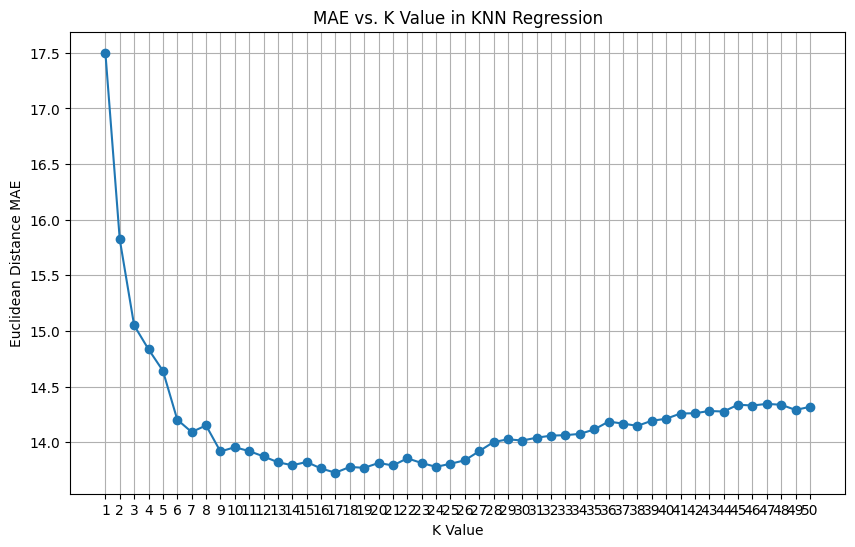

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel('Merged_data.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 4: Calculate Euclidean Distance MAE
def euclidean_distance_mae(mae_x, mae_y):
    return np.sqrt(mae_x**2 + mae_y**2)

# Step 5: Train KNN Models with Different K Values
k_values = range(1, 51)  # Test K values from 1 to 20
euclidean_mae_values = []

for k in k_values:
    # Train the Models
    model_x = KNeighborsRegressor(n_neighbors=k)
    model_x.fit(X_train, y_x_train)

    model_y = KNeighborsRegressor(n_neighbors=k)
    model_y.fit(X_train, y_y_train)

    # Predictions
    test_predictions_x = model_x.predict(X_test)
    test_predictions_y = model_y.predict(X_test)

    # Calculate MAE
    mae_x = mean_absolute_error(y_x_test, test_predictions_x)
    mae_y = mean_absolute_error(y_y_test, test_predictions_y)

    # Calculate Euclidean Distance MAE
    euclidean_mae = euclidean_distance_mae(mae_x, mae_y)
    euclidean_mae_values.append(euclidean_mae)

# Step 6: Plot MAE for Different K Values
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_mae_values, marker='o', linestyle='-')
plt.title('MAE vs. K Value in KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Euclidean Distance MAE')
plt.xticks(k_values)
plt.grid(True)
plt.show()


SVR for the first dataset

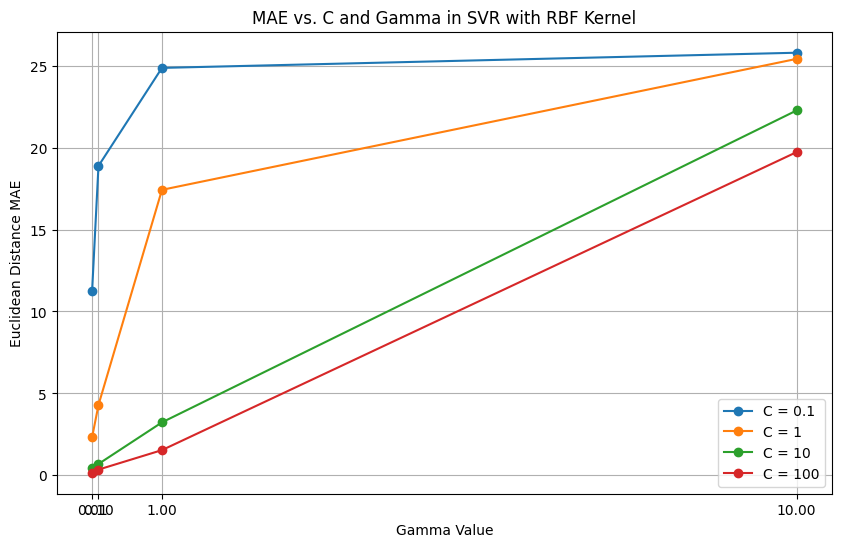

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel('Generated1.xlsx')

# Step 2: Preprocess the Data
X = data[['R1', 'R2', 'R3', 'R4']]  # Features (RSSI values from R1 to R4)
y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 4: Calculate Euclidean Distance MAE
def euclidean_distance_mae(mae_x, mae_y):
    return np.sqrt(mae_x**2 + mae_y**2)

# Step 5: Train SVR Models with Different C and Gamma Values
c_values = [0.1, 1, 10, 100]  # Test C values
gamma_values = [0.01, 0.1, 1, 10]  # Test gamma values
euclidean_mae_values = []

for c in c_values:
    for gamma in gamma_values:
        # Train the Models
        model_x = SVR(kernel='rbf', C=c, gamma=gamma)
        model_x.fit(X_train, y_x_train)

        model_y = SVR(kernel='rbf', C=c, gamma=gamma)
        model_y.fit(X_train, y_y_train)

        # Predictions
        test_predictions_x = model_x.predict(X_test)
        test_predictions_y = model_y.predict(X_test)

        # Calculate MAE
        mae_x = mean_absolute_error(y_x_test, test_predictions_x)
        mae_y = mean_absolute_error(y_y_test, test_predictions_y)

        # Calculate Euclidean Distance MAE
        euclidean_mae = euclidean_distance_mae(mae_x, mae_y)
        euclidean_mae_values.append(euclidean_mae)

# Step 6: Reshape MAE Values for Plotting
euclidean_mae_array = np.array(euclidean_mae_values).reshape(len(c_values), len(gamma_values))

# Step 7: Plot MAE for Different C and Gamma Values
plt.figure(figsize=(10, 6))
for i, c in enumerate(c_values):
    plt.plot(gamma_values, euclidean_mae_array[i], label='C = {}'.format(c), marker='o')

plt.title('MAE vs. C and Gamma in SVR with RBF Kernel')
plt.xlabel('Gamma Value')
plt.ylabel('Euclidean Distance MAE')
plt.xticks(gamma_values)
plt.grid(True)
plt.legend()
plt.show()


# **Adding the gateways data**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')

# Step 2: Preprocess the Data
# Use all RSSI values as features
X = data[['R1 to R2', 'R1 to R3', 'R1 to R4',
          'R2 to R1', 'R2 to R3', 'R2 to R4',
          'R3 to R1', 'R3 to R2', 'R3 to R4',
          'R4 to R1', 'R4 to R2', 'R4 to R3',
          'S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']]

# Target coordinates
y = data['Comment'].apply(lambda x: eval(x))

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 4: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Calculate Euclidean Distance MAE
def euclidean_distance_mae(mae_x, mae_y):
    return np.sqrt(mae_x**2 + mae_y**2)

# Step 6: Train SVR Models with Different C and Gamma Values
c_values = [0.1, 1, 10, 100]  # Test C values
gamma_values = [0.01, 0.1, 1, 10]  # Test gamma values
euclidean_mae_values = []

for c in c_values:
    for gamma in gamma_values:
        # Train the Models
        model_x = SVR(kernel='rbf', C=c, gamma=gamma)
        model_x.fit(X_train_scaled, y_x_train)

        model_y = SVR(kernel='rbf', C=c, gamma=gamma)
        model_y.fit(X_train_scaled, y_y_train)

        # Predictions
        test_predictions_x = model_x.predict(X_test_scaled)
        test_predictions_y = model_y.predict(X_test_scaled)

        # Calculate MAE
        mae_x = mean_absolute_error(y_x_test, test_predictions_x)
        mae_y = mean_absolute_error(y_y_test, test_predictions_y)

        # Calculate Euclidean Distance MAE
        euclidean_mae = euclidean_distance_mae(mae_x, mae_y)
        euclidean_mae_values.append((c, gamma, euclidean_mae))

# Step 7: Find the Best C and Gamma
best_c, best_gamma, best_mae = min(euclidean_mae_values, key=lambda x: x[2])
print(f"Best C: {best_c}, Best Gamma: {best_gamma}, Best Euclidean MAE: {best_mae}")

# Step 8: Train Final Models with Best Parameters
final_model_x = SVR(kernel='rbf', C=best_c, gamma=best_gamma)
final_model_x.fit(X_train_scaled, y_x_train)

final_model_y = SVR(kernel='rbf', C=best_c, gamma=best_gamma)
final_model_y.fit(X_train_scaled, y_y_train)

# Step 9: Continuous Prediction
while True:
    # Prompt the user for RSSI values from R1 to R4
    r1_r2 = float(input("Enter RSSI from R1 to R2: "))
    r1_r3 = float(input("Enter RSSI from R1 to R3: "))
    r1_r4 = float(input("Enter RSSI from R1 to R4: "))
    r2_r1 = float(input("Enter RSSI from R2 to R1: "))
    r2_r3 = float(input("Enter RSSI from R2 to R3: "))
    r2_r4 = float(input("Enter RSSI from R2 to R4: "))
    r3_r1 = float(input("Enter RSSI from R3 to R1: "))
    r3_r2 = float(input("Enter RSSI from R3 to R2: "))
    r3_r4 = float(input("Enter RSSI from R3 to R4: "))
    r4_r1 = float(input("Enter RSSI from R4 to R1: "))
    r4_r2 = float(input("Enter RSSI from R4 to R2: "))
    r4_r3 = float(input("Enter RSSI from R4 to R3: "))
    s0_r1 = float(input("Enter RSSI from S0 to R1: "))
    s0_r2 = float(input("Enter RSSI from S0 to R2: "))
    s0_r3 = float(input("Enter RSSI from S0 to R3: "))
    s0_r4 = float(input("Enter RSSI from S0 to R4: "))

    # Predict the sender's position using the trained models
    input_rssis = np.array([[r1_r2, r1_r3, r1_r4,
                             r2_r1, r2_r3, r2_r4,
                             r3_r1, r3_r2, r3_r4,
                             r4_r1, r4_r2, r4_r3,
                             s0_r1, s0_r2, s0_r3, s0_r4]])
    input_rssis_scaled = scaler.transform(input_rssis)

    predicted_x = final_model_x.predict(input_rssis_scaled)[0]
    predicted_y = final_model_y.predict(input_rssis_scaled)[0]

    print("Predicted position: ({}, {})".format(predicted_x, predicted_y))

    # Ask if the user wants to continue or stop
    choice = input("Do you want to continue? (yes/no): ").lower()
    if choice != 'yes':
        break


Best C: 100, Best Gamma: 0.1, Best Euclidean MAE: 11.441645880753097
Enter RSSI from R1 to R2: -70
Enter RSSI from R1 to R3: -71.5
Enter RSSI from R1 to R4: -77
Enter RSSI from R2 to R1: -69
Enter RSSI from R2 to R3: -97.5
Enter RSSI from R2 to R4: -86
Enter RSSI from R3 to R1: -71
Enter RSSI from R3 to R2: -101
Enter RSSI from R3 to R4: -71
Enter RSSI from R4 to R1: -76
Enter RSSI from R4 to R2: -86.6
Enter RSSI from R4 to R3: -71
Enter RSSI from S0 to R1: -68.3
Enter RSSI from S0 to R2: -81.3
Enter RSSI from S0 to R3: -82
Enter RSSI from S0 to R4: -89


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted position: (14.676866687512039, 16.754044385959258)


KeyboardInterrupt: Interrupted by user

# Plotting for different values of **Gamma**

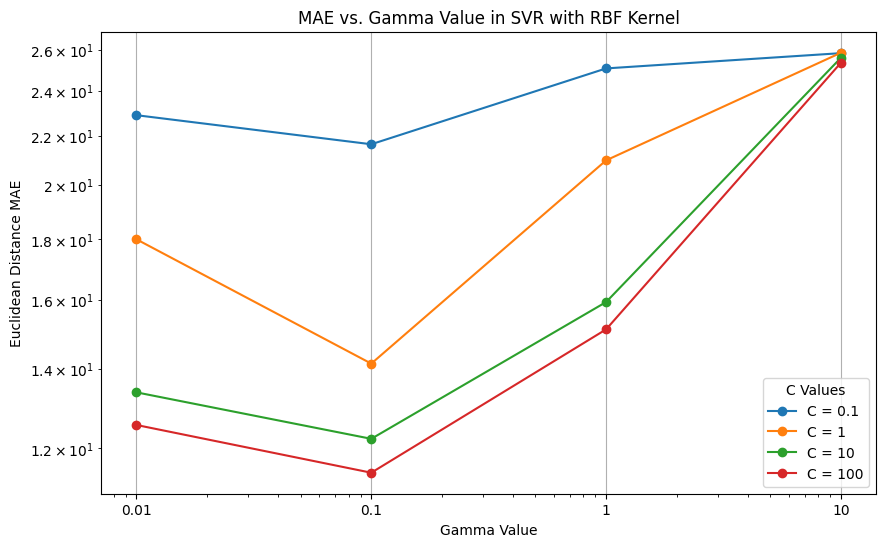

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_excel('rssi_values_with_timestamp.xlsx')

# Step 2: Preprocess the Data
X = data[['R1 to R2', 'R1 to R3', 'R1 to R4',
          'R2 to R1', 'R2 to R3', 'R2 to R4',
          'R3 to R1', 'R3 to R2', 'R3 to R4',
          'R4 to R1', 'R4 to R2', 'R4 to R3',
          'S0 to R1', 'S0 to R2', 'S0 to R3', 'S0 to R4']]  # Features (RSSI values)

y = data['Comment'].apply(lambda x: eval(x))  # Target coordinates

# Separate the target coordinates into x and y
y_x = y.apply(lambda x: x[0])  # X coordinates
y_y = y.apply(lambda x: x[1])  # Y coordinates

# Step 3: Split the Data
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Step 4: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Calculate Euclidean Distance MAE
def euclidean_distance_mae(mae_x, mae_y):
    return np.sqrt(mae_x**2 + mae_y**2)

# Step 6: Train SVR Models with Different C and Gamma Values
c_values = [0.1, 1, 10, 100]  # Test C values
gamma_values = [0.01, 0.1, 1, 10]  # Test gamma values
results = []

for c in c_values:
    for gamma in gamma_values:
        # Train the Models
        model_x = SVR(kernel='rbf', C=c, gamma=gamma)
        model_x.fit(X_train_scaled, y_x_train)

        model_y = SVR(kernel='rbf', C=c, gamma=gamma)
        model_y.fit(X_train_scaled, y_y_train)

        # Predictions
        test_predictions_x = model_x.predict(X_test_scaled)
        test_predictions_y = model_y.predict(X_test_scaled)

        # Calculate MAE
        mae_x = mean_absolute_error(y_x_test, test_predictions_x)
        mae_y = mean_absolute_error(y_y_test, test_predictions_y)

        # Calculate Euclidean Distance MAE
        euclidean_mae = euclidean_distance_mae(mae_x, mae_y)
        results.append((c, gamma, euclidean_mae))

# Step 7: Reshape Results for Plotting
results_df = pd.DataFrame(results, columns=['C', 'Gamma', 'Euclidean_MAE'])

# Step 8: Plot MAE for Different C and Gamma Values
fig, ax = plt.subplots(figsize=(10, 6))
for c in c_values:
    subset = results_df[results_df['C'] == c]
    ax.plot(subset['Gamma'], subset['Euclidean_MAE'], marker='o', label=f'C = {c}')

plt.title('MAE vs. Gamma Value in SVR with RBF Kernel')
plt.xlabel('Gamma Value')
plt.ylabel('Euclidean Distance MAE')
plt.xscale('log')
plt.yscale('log')
plt.xticks(gamma_values, gamma_values)
plt.grid(True)
plt.legend(title='C Values')
plt.show()
